In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d
#https://www.section.io/engineering-education/support-vector-regression-in-python/



In [2]:
#https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy2.csv')
df = df.set_index('date')
#train = train.iloc[20:,:]
df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444
...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959


In [3]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset

In [4]:
nobs = 31
df_train, df_test = df[0:-nobs], df[-nobs:]
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag
date,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959


In [5]:
X_train = df_train.drop(['BEIR'],axis=1).values.astype(float)
y_train = df_train['BEIR'].values.astype(float)
X_test = df_test.drop(['BEIR'],axis=1).values.astype(float)
y_test = df_test['BEIR'].values.astype(float)

In [6]:
y = y_train.reshape(-1,1)
y

array([[2.46 ],
       [2.44 ],
       [2.42 ],
       [2.4  ],
       [2.4  ],
       [2.4  ],
       [2.39 ],
       [2.36 ],
       [2.32 ],
       [2.35 ],
       [2.32 ],
       [2.32 ],
       [2.32 ],
       [2.36 ],
       [2.38 ],
       [2.32 ],
       [2.27 ],
       [2.24 ],
       [2.24 ],
       [2.24 ],
       [2.25 ],
       [2.31 ],
       [2.34 ],
       [2.3  ],
       [2.34 ],
       [2.34 ],
       [2.34 ],
       [2.33 ],
       [2.32 ],
       [2.32 ],
       [2.35 ],
       [2.33 ],
       [2.33 ],
       [2.33 ],
       [2.332],
       [2.31 ],
       [2.28 ],
       [2.22 ],
       [2.28 ],
       [2.28 ],
       [2.28 ],
       [2.33 ],
       [2.36 ],
       [2.34 ],
       [2.32 ],
       [2.33 ],
       [2.33 ],
       [2.33 ],
       [2.24 ],
       [2.26 ],
       [2.28 ],
       [2.28 ],
       [2.35 ],
       [2.35 ],
       [2.35 ],
       [2.4  ],
       [2.38 ],
       [2.41 ],
       [2.43 ],
       [2.4  ],
       [2.4  ],
       [2.4  ],
       [

In [7]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = y_train.reshape(-1,1)
y = sc_y.fit_transform(y)

In [8]:
#rbf Kernel

In [9]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
y_pred

array([[2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513, 2.56962513, 2.56962513, 2.56962513, 2.56962513,
        2.56962513]])

In [11]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)
        
y_pred1

[2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578,
 2.569625133998578]

In [12]:
len(df_test.index)
len(y_test)

31

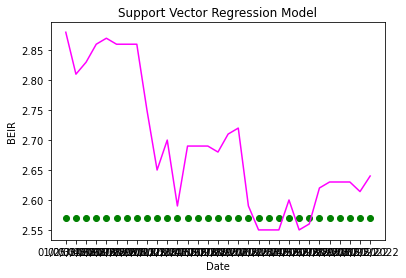

In [13]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [14]:
#Grid Search

from sklearn.model_selection import GridSearchCV

param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

regressor = SVR()
regressor.fit(X,y)

grids = GridSearchCV(regressor,param,cv=5, scoring ='neg_root_mean_squared_error')

grids.fit(X_train,y_train)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale')},
             scoring='neg_root_mean_squared_error')

In [15]:
grids.cv_results_
grids.best_params_
grids.best_score_*-1

0.16387770463011417

In [16]:
results_df = pd.DataFrame(grids.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_0.5_8_scale,"{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",1,-0.163878,0.092193
10_0.5_3_scale,"{'C': 10, 'coef0': 0.5, 'degree': 3, 'gamma': ...",1,-0.163878,0.092193
10_10_8_scale,"{'C': 10, 'coef0': 10, 'degree': 8, 'gamma': '...",1,-0.163878,0.092193
10_10_3_scale,"{'C': 10, 'coef0': 10, 'degree': 3, 'gamma': '...",1,-0.163878,0.092193
10_0.01_8_scale,"{'C': 10, 'coef0': 0.01, 'degree': 8, 'gamma':...",1,-0.163878,0.092193


In [17]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],degree=grids.best_params_['degree'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)

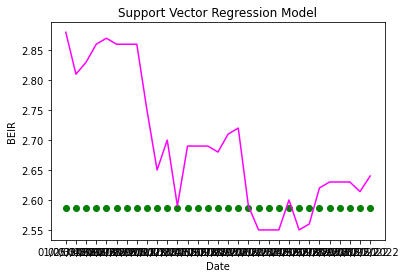

In [19]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [20]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)
metrics.mean_squared_error(y_test, y_pred1, squared = False)

0.15082733747351854

best parameters: {'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale'}
best score:      -0.16388 (+/-0.09219)
{'C': 10,
 'cache_size': 200,
 'coef0': 0.01,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
35,0.004506,0.002943,0.001505,0.000585,10,0.5,8,scale,"{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",-0.072289,-0.063640,-0.159904,-0.212395,-0.311160,-0.163878,0.092193,1
33,0.003818,0.001831,0.002170,0.001710,10,0.5,3,scale,"{'C': 10, 'coef0': 0.5, 'degree': 3, 'gamma': ...",-0.072289,-0.063640,-0.159904,-0.212395,-0.311160,-0.163878,0.092193,1
31,0.004201,0.001999,0.002043,0.001332,10,10,8,scale,"{'C': 10, 'coef0': 10, 'degree': 8, 'gamma': '...",-0.072289,-0.063640,-0.159904,-0.212395,-0.311160,-0.163878,0.092193,1
29,0.002616,0.000545,0.001163,0.000249,10,10,3,scale,"{'C': 10, 'coef0': 10, 'degree': 3, 'gamma': '...",-0.072289,-0.063640,-0.159904,-0.212395,-0.311160,-0.163878,0.092193,1
27,0.004150,0.002171,0.001278,0.000296,10,0.01,8,scale,"{'C': 10, 'coef0': 0.01, 'degree': 8, 'gamma':...",-0.072289,-0.063640,-0.159904,-0.212395,-0.311160,-0.163878,0.092193,1
25,0.002765,0.000719,0.001276,0.000388,10,0.01,3,scale,"{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma':...",-0.072289,-0.063640,-0.159904,-0.212395,-0.311160,-0.163878,0.092193,1
23,0.002534,0.000611,0.001127,0.000271,5,0.5,8,scale,"{'C': 5, 'coef0': 0.5, 'degree': 8, 'gamma': '...",-0.087272,-0.067639,-0.155048,-0.215453,-0.313449,-0.167772,0.089626,7
21,0.002672,0.001004,0.001227,0.000327,5,0.5,3,scale,"{'C': 5, 'coef0': 0.5, 'degree': 3, 'gamma': '...",-0.087272,-0.067639,-0.155048,-0.215453,-0.313449,-0.167772,0.089626,7
19,0.002699,0.001761,0.001275,0.000410,5,10,8,scale,"{'C': 5, 'coef0': 10, 'degree': 8, 'gamma': 's...",-0.087272,-0.067639,-0.155048,-0.215453,-0.313449,-0.167772,0.089626,7
15,0.003033,0.000979,0.001543,0.000535,5,0.01,8,scale,"{'C': 5, 'coef0': 0.01, 'degree': 8, 'gamma': ...",-0.087272,-0.067639,-0.155048,-0.215453,-0.313449,-0.167772,0.089626,7


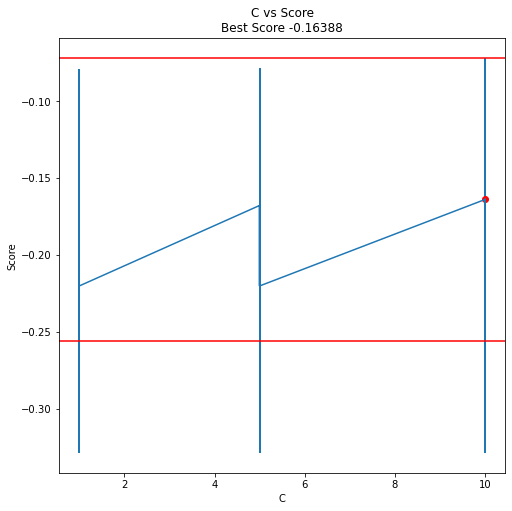

In [22]:
GridSearch_table_plot(grids, "C", negative=False)

In [ ]:
#Random Search

In [59]:
from sklearn.model_selection import RandomizedSearchCV

param = {'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

regressor = SVR()
regressor.fit(X,y)

random = RandomizedSearchCV(regressor,param,cv=5, n_jobs = -1, scoring ='neg_root_mean_squared_error',
                             random_state = 1)

random.fit(X_train,y_train)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10],
                                        'coef0': [0.01, 10, 0.5],
                                        'degree': [3, 8],
                                        'gamma': ('auto', 'scale')},
                   random_state=1, scoring='neg_root_mean_squared_error')

In [62]:
random.cv_results_
random.best_params_
random.best_score_*-1

0.16387770463011417

In [71]:
results_df = pd.DataFrame(random.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]].head()

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
scale_3_10_10,"{'gamma': 'scale', 'degree': 3, 'coef0': 10, '...",1,-0.163878,0.092193
scale_8_10_5,"{'gamma': 'scale', 'degree': 8, 'coef0': 10, '...",2,-0.167772,0.089626
scale_3_10_5,"{'gamma': 'scale', 'degree': 3, 'coef0': 10, '...",2,-0.167772,0.089626
scale_3_0.5_5,"{'gamma': 'scale', 'degree': 3, 'coef0': 0.5, ...",2,-0.167772,0.089626
scale_8_0.5_5,"{'gamma': 'scale', 'degree': 8, 'coef0': 0.5, ...",2,-0.167772,0.089626


In [63]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf',C = grids.best_params_['C'], coef0=grids.best_params_['coef0'],degree=grids.best_params_['degree'],gamma=grids.best_params_['gamma'])
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)

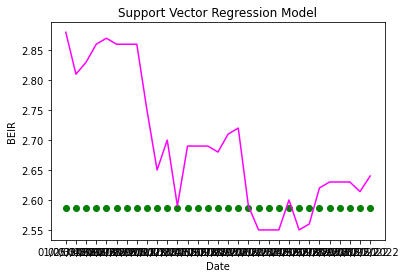

In [65]:
plt.plot(df_test.index, y_test, color = 'magenta')
plt.scatter(df_test.index, y_pred1, color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('Date')
plt.ylabel('BEIR')
plt.show()

In [66]:
metrics.mean_squared_error(y_test, y_pred1, squared = False)

0.15082733747351854

In [21]:
#https://www.kaggle.com/code/grfiv4/displaying-the-results-of-a-grid-search/notebook
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf") '''
    
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()